## 決定木

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the class distribution is preserved in both training and test sets

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')
        
    # テストデータ点を目立たせる（点を○で表示）
    if test_idx:
        # すべてのテストデータ点をプロット
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidths=1, marker='o', s=100, label='Test set', edgecolor='black')


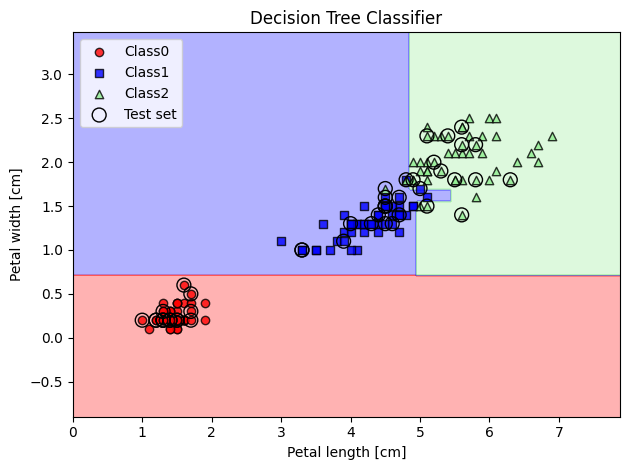

In [4]:
from sklearn.tree import DecisionTreeClassifier
# 決定木分類器のインスタンスを作成
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)  # モデルを訓練データで学習

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
# 決定領域をプロット
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.title('Decision Tree Classifier')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

情報利得が最大となるような閾値を可能であれば全探索する。無理なら近似。

### 可視化

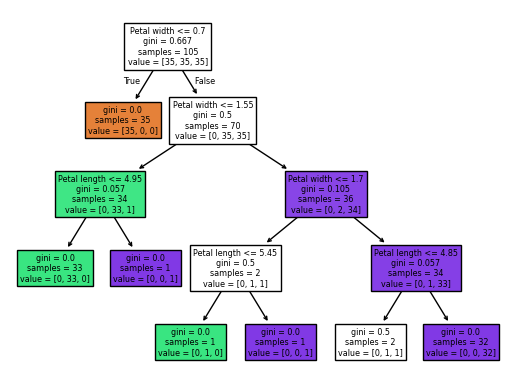

In [5]:
from sklearn import tree
# 決定木の可視化
feature_name = ['Petal length', 'Petal width', 'Sepal length', 'Sepal width']
tree.plot_tree(tree_model, feature_names=feature_name, filled=True) # filled=Trueでノードを色付け
plt.show()

## アンサンブル法

### ランダムフォレスト
・それぞれバリアンスが高い複数の（深い）決定木を平均することで、より汎化性能が高く過学習に対して堅牢なモデルを構築する。

### ランダムフォレストアルゴリズム（決定木学習）

1. **データ点をランダムに選択（ブートストラップ標本を作成）**

   * 訓練データからランダムにデータ点を選んでブートストラップ標本を作成する（復元抽出）。

2. **各決定木の作成（ノードごとに以下の作業を行う）**
   a. 特徴量の中からランダムに *m* 個の特徴量を選択する（特徴量のサブセット、非復元抽出）。  
   b. その *m* 個の特徴量の中から、目的関数（例えばジニ不純度など）に従って最も良い分割を与える特徴量を選んで分割する。

3. **手順1〜2を *k* 回繰り返して、 *k* 本の決定木を作成する。**

4. **多数決で最終的なクラスを決定する（分類の場合）**

   * 各決定木の出力のうち、多数派のクラスを最終的な予測結果とする。

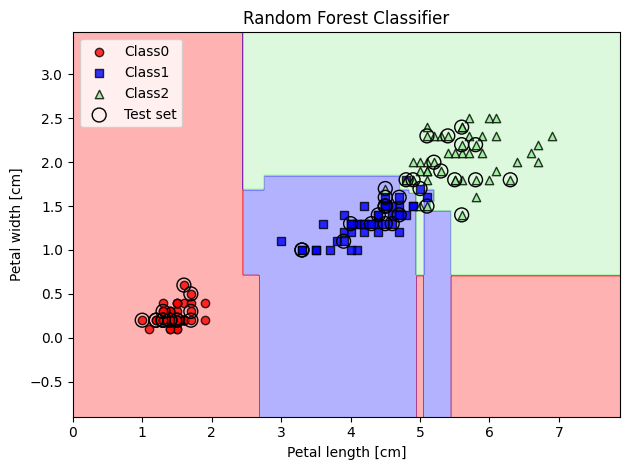

In [6]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレスト分類器のインスタンスを作成
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)  # n_jobs=-1で全てのCPUコアを使用
forest.fit(X_train, y_train)  # モデルを訓練データで学習
# 決定領域をプロット
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.title('Random Forest Classifier')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()